In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ai_data = pd.read_csv('../data/AI_generated/original_AI.csv')
human_data = pd.read_csv('../data/Real_Code/code_data.csv')

print("AI Data Preview:")
print(ai_data.head())
print("\nHuman Data Preview:")
print(human_data.head())

print("\nAI Data Description:")
print(ai_data.describe(include='all'))
print("\nHuman Data Description:")
print(human_data.describe(include='all'))


AI Data Preview:
          Filename            Vulnerability type  \
0   FormAI_16037.c  NOT VULNERABLE up to bound k   
1   FormAI_11430.c  NOT VULNERABLE up to bound k   
2  FormAI_104034.c  NOT VULNERABLE up to bound k   
3  FormAI_111895.c  NOT VULNERABLE up to bound k   
4   FormAI_15262.c                    VULNERABLE   

                                         Source code Function name  Line  \
0  //FormAI DATASET v1.0 Category: Threading Libr...           NaN   NaN   
1  //FormAI DATASET v1.0 Category: Simple Web Ser...           NaN   NaN   
2  //FormAI DATASET v1.0 Category: Rogue-like Gam...           NaN   NaN   
3  //FormAI DATASET v1.0 Category: Product Invent...           NaN   NaN   
4  //FormAI DATASET v1.0 Category: Digital Waterm...          main  15.0   

                 Error type  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4  buffer overflow on scanf  

Human Data Preview:
            

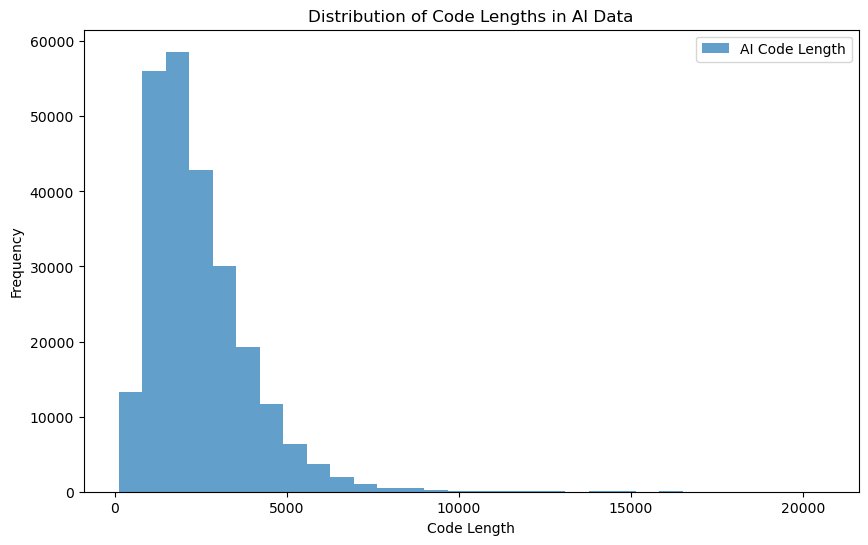

In [2]:
ai_data['code_length'] = ai_data['Source code'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(ai_data['code_length'], bins=30, alpha=0.7, label='AI Code Length')
plt.title('Distribution of Code Lengths in AI Data')
plt.xlabel('Code Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


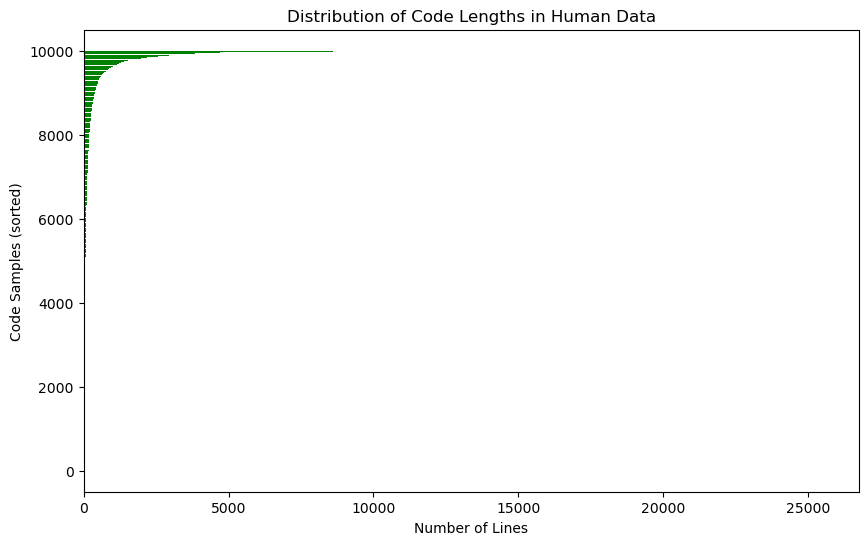

In [3]:

plt.figure(figsize=(10, 6))
plt.barh(range(len(human_data['Number of Lines'])), human_data['Number of Lines'].sort_values(), color='green')
plt.title('Distribution of Code Lengths in Human Data')
plt.ylabel('Code Samples (sorted)')
plt.xlabel('Number of Lines')
plt.show()


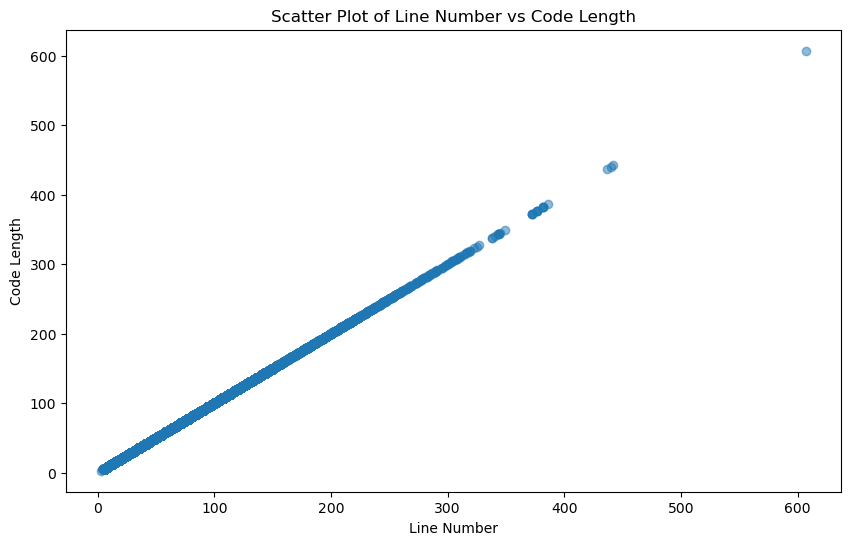

In [4]:

plt.figure(figsize=(10, 6))
plt.scatter(ai_data['Line'], ai_data['Line'], alpha=0.5)
plt.title('Scatter Plot of Line Number vs Code Length')
plt.xlabel('Line Number')
plt.ylabel('Code Length')
plt.show()


In [5]:
# pip install wordcloud

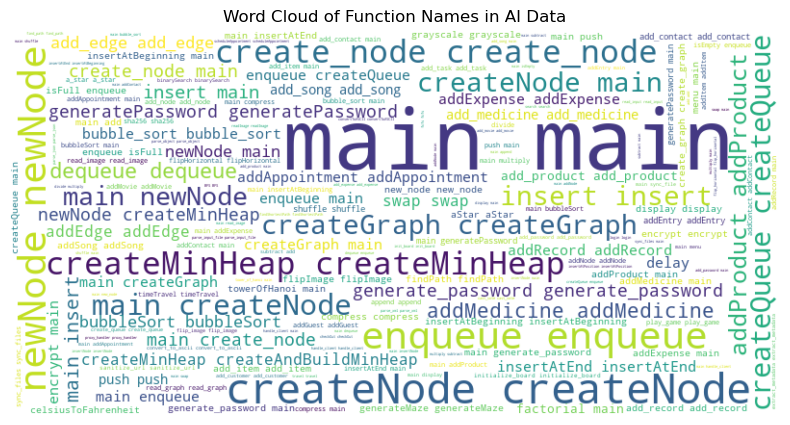

In [8]:
from wordcloud import WordCloud


wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(ai_data['Function name'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Function Names in AI Data')
plt.show()


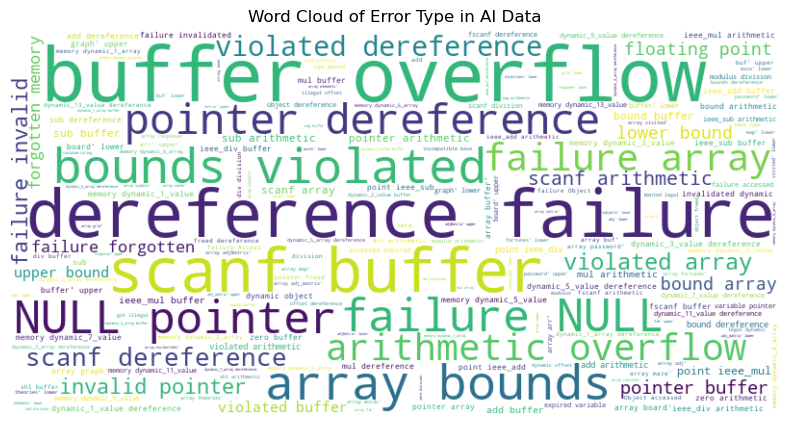

In [10]:
from wordcloud import WordCloud


wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(ai_data['Error type'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Error Type in AI Data')
plt.show()


# SVM

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer


In [12]:
ai_data = pd.read_csv('../data/AI_generated/AI_written_10000.csv')
human_data = pd.read_csv('../data/Real_Code/code_data.csv')

In [13]:
vectorizer = CountVectorizer(min_df=5, max_features=100) 
ai_code_features = vectorizer.fit_transform(ai_data['code']).toarray()
human_code_features = vectorizer.transform(human_data['Code']).toarray()

In [14]:
ai_features_df = pd.DataFrame(ai_code_features, columns=vectorizer.get_feature_names_out())
human_features_df = pd.DataFrame(human_code_features, columns=vectorizer.get_feature_names_out())


In [16]:
ai_features_df['code_length'] = ai_data['code'].apply(len)
human_features_df['code_length'] = human_data['Code'].apply(len)

In [17]:
ai_features_df['label'] = 0
human_features_df['label'] = 1

In [18]:
data = pd.concat([ai_features_df, human_features_df], ignore_index=True)

In [25]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)


In [28]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]})

In [29]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'gamma': 0.01}


In [30]:
best_model = grid_search.best_estimator_

In [31]:

predictions = best_model.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2019
           1       0.99      0.99      0.99      1981

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

